In [ ]:
## Lab | Random variable distributions
## Refer to the files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv dataset.

## Instructions:
    ## Get the numerical variables from our dataset.
    ## Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
    ## Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [13]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [5]:
df.shape

(9134, 24)

In [10]:
df.isnull().sum()   ## Checking if there are NaN values

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [11]:
df.describe(include='all')  ## Describing all columns of a DataFrame regardless of data type.

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
count,9134,9134,9134.000000,9134,9134,9134,9134,9134,9134,9134.000000,...,9134.000000,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134
unique,9134,5,NaN,2,3,5,59,5,2,NaN,...,NaN,NaN,NaN,3,9,4,4,NaN,6,3
top,BU79786,California,NaN,No,Basic,Bachelor,1/10/11,Employed,F,NaN,...,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize
freq,1,3150,NaN,7826,5568,2748,195,5698,4658,NaN,...,NaN,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424
mean,NaN,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,NaN,37657.380009,...,48.064594,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN
std,NaN,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,NaN,30379.904734,...,27.905991,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN,NaN
min,NaN,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN
25%,NaN,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN
50%,NaN,NaN,5780.182197,NaN,NaN,NaN,NaN,NaN,NaN,33889.500000,...,48.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,383.945434,NaN,NaN
75%,NaN,NaN,8962.167041,NaN,NaN,NaN,NaN,NaN,NaN,62320.000000,...,71.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,547.514839,NaN,NaN


In [12]:
df.describe()   ## This is a method in Pandas to provides a quick way to generate descriptive statistics on NUMERIC columns in a DataFrame

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [14]:
## Plot a correlation matrix
customer_df.corr(numeric_only=True)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


<Axes: >

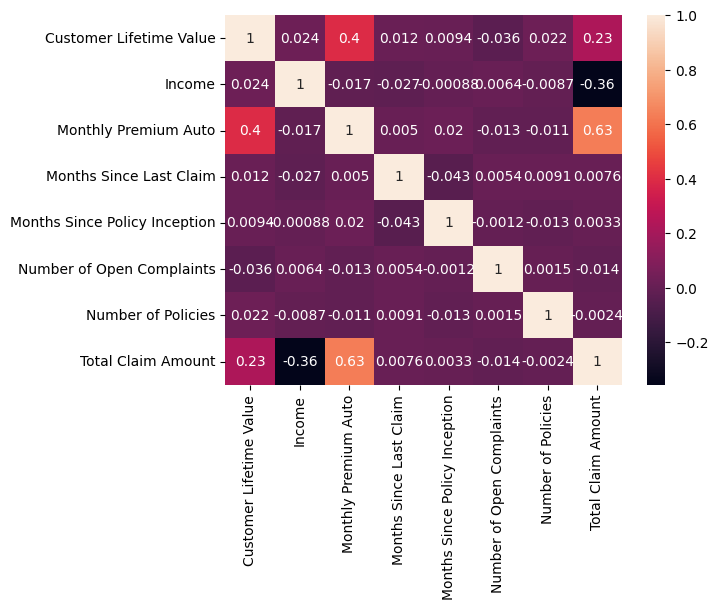

In [17]:
## Multicollinearity in regression analysis refers to a situation where two or more predictor variables in a model are highly correlated, meaning they provide redundant information about the response variable. 

correlations_matrix= customer_df.corr(numeric_only=True)
sns.heatmap(correlations_matrix, annot=True)

## We can assess from the heatmap below that there are not high features correlated.
## "monthly_premium_auto" and "cusotmer_lifetime_value" has moderate positive correlation (0.40), indicating as customerlifetime value increases, so does the monthly premium auto. This could suggests that customers who are valued higher potentially buy more premium policies.
## "total_clian_amount" and "monthly_premium_auto" have strong positive correlation (0.63), which is logical since higher premiums often lead to higher claim amounts, possibly reflecting higher coverage.
## For the cases with a very low positive correlation, they imply almost no direct relationship between the variables.

In [18]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [20]:
## Get the numerical variables from our dataset

numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_vars

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

In [24]:
    ## Alternative solution to Get the numerical variables from our dataset

numerical_vars_2 = df.select_dtypes(exclude=['object']).columns.tolist()
numerical_vars_2

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

In [ ]:
## Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

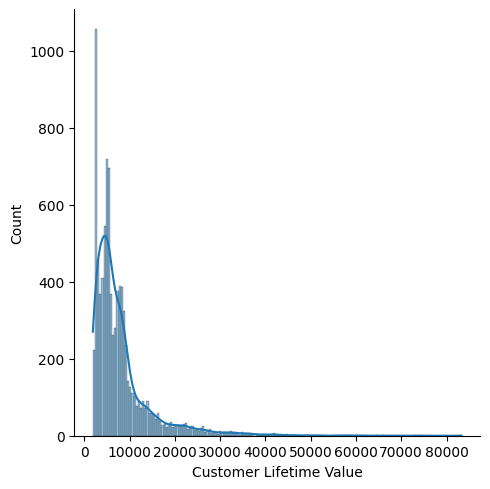

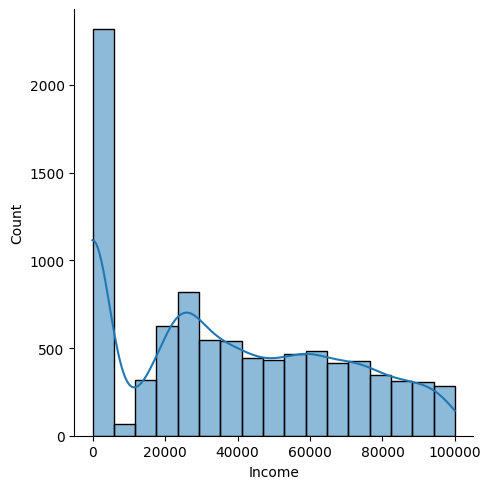

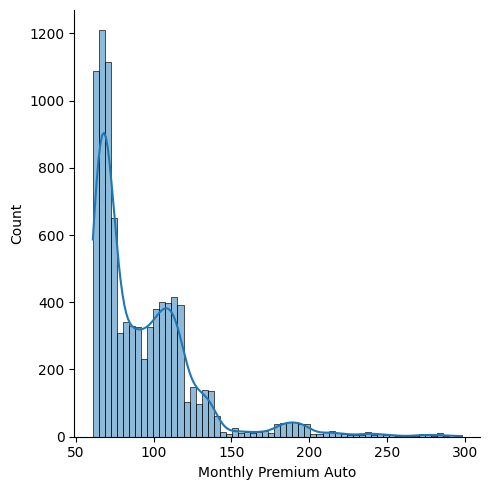

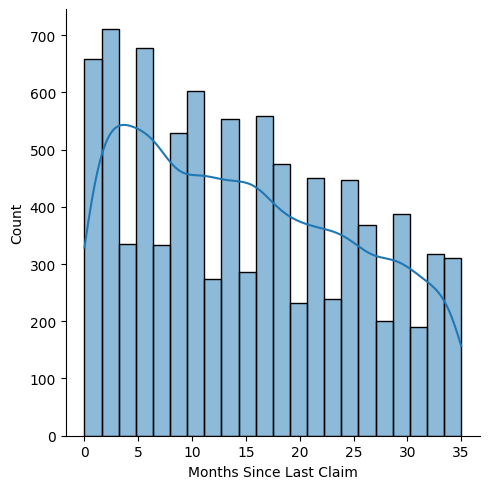

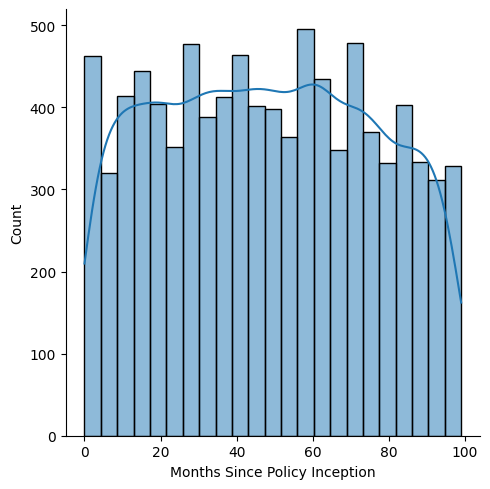

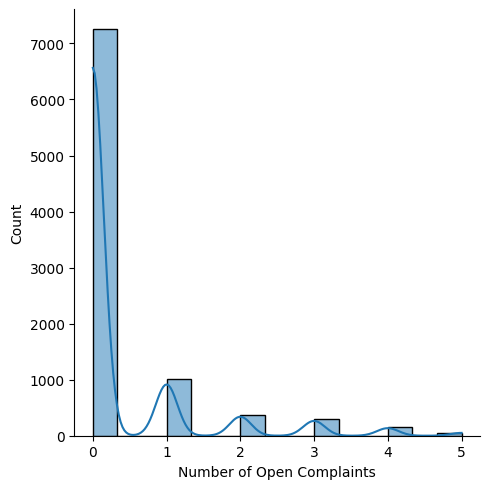

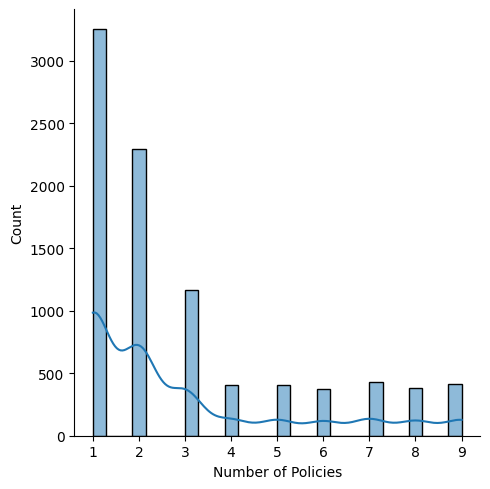

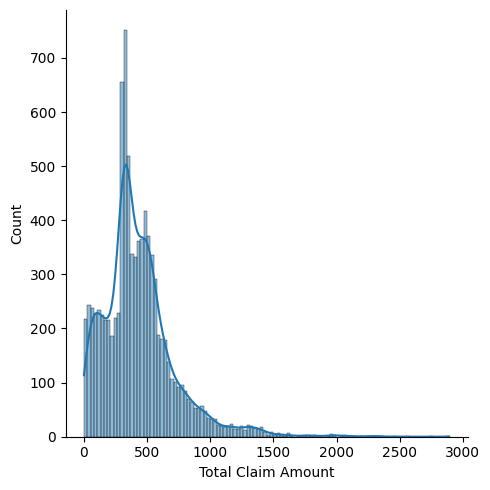

In [28]:
for col in numerical_vars: 
    sns.displot(df[col],  kde=True)

In [ ]:
#### Distribution Insights:
    ## Customer Lifetime Value & Total Claim Amount: Show right-skewed distributions, hinting at exponential characteristics. A large number of customers have values on the lower end, with fewer customers having very high values.
    ## Income: Also right-skewed, indicating many customers have low income, with a spike at the $0 income mark, possibly indicating unemployed or non-reporting customers.
    ## Monthly Premium Auto: Slightly right-skewed, suggesting most customers pay lower premiums, with fewer customers at higher premiums.
    ## Months Since Last Claim & Months Since Policy Inception: These don't fit neatly into normal or exponential distributions, showing more uniform or bimodal tendencies.
    ## Number of Open Complaints: Highly concentrated at 0, indicating most customers have no complaints.
    ## Number of Policies: Shows spikes at certain policy counts, not fitting a clear normal or exponential trend.

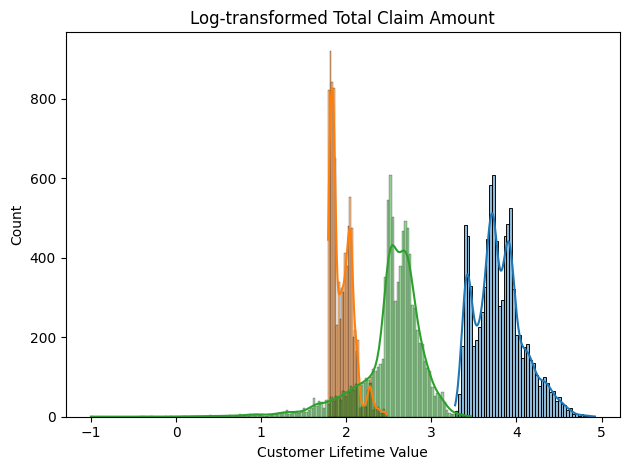

In [41]:
# Applying log transformation where applicable (excluding columns with 0 values to avoid -inf)
log_transformable_vars = ['Customer Lifetime Value', 'Monthly Premium Auto', 'Total Claim Amount']
df_log_transformed = df.copy()

# Applying the log transformation where applicable
for var in log_transformable_vars:
    df_log_transformed[var] = df_log_transformed[var].apply(lambda x: log_transformation(x))

for i, var in enumerate(log_transformable_vars):
    sns.histplot(df_log_transformed[var], kde=True).set_title(f'Log-transformed {var}')

plt.tight_layout()
plt.show()



In [ ]:
## https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9
    ## Log transformation is a data transformation method in which it replaces each variable x with a log(x). 
    ## The choice of the logarithm base is usually left up to the analyst and it would depend on the purposes of statistical modeling.
    ## When our original continuous data do not follow the bell curve, we can log transform this data to make it as “normal” as possible so that the statistical analysis results from this data become more valid. 
    ## In other words, the log transformation reduces or removes the skewness of our original data

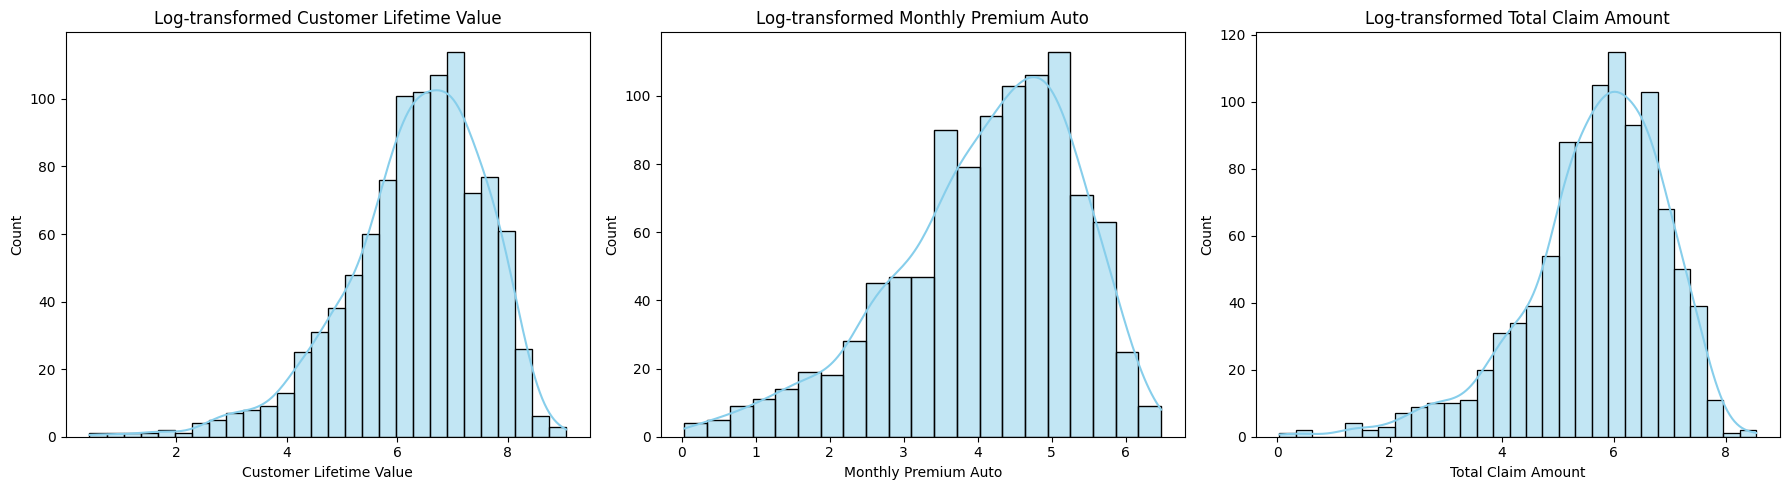

ModuleNotFoundError: No module named 'ace_tools'

In [44]:
# Your custom log transformation function, if needed
def log_transformation(x):
    return np.log1p(x)  # log1p is log(1 + x) to handle zero values

df = customer_df_no_outliers.copy()

# Applying log transformation where applicable (excluding columns with 0 values to avoid -inf)
log_transformable_vars = ['Customer Lifetime Value', 'Monthly Premium Auto', 'Total Claim Amount']
df_log_transformed = df.copy()

# Applying the log transformation where applicable
for var in log_transformable_vars:
    df_log_transformed[var] = df_log_transformed[var].apply(lambda x: log_transformation(x))

# Plotting the log-transformed variables side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, var in enumerate(log_transformable_vars):
    sns.histplot(df_log_transformed[var], kde=True, ax=axes[i], color="skyblue").set_title(f'Log-transformed {var}')

plt.tight_layout()
plt.show()

# Display the transformed DataFrame
import ace_tools as tools; tools.display_dataframe_to_user(name="Log Transformed DataFrame", dataframe=df_log_transformed)
